In [1]:
import numpy as np
import dill
import matplotlib.pyplot as plt
import data_visualization as dv
from copy import deepcopy
import time
from pathlib import Path
import pandas as pd
import glob
from IPython.display import display

import read_data_functions as rdf
import plot_functions as pf
from Optimal_Stopping_Object import ModelConstructor
from initializer import InitialThangs
import loss_functions as lf
import constants
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)

# Model Inputs

---
1. Switch Delay
2. Reward weighting
3. Altered SD 

        - Agent SD
        - Movement SD
        - Reaction SD
        - Gamble SD

---
NOTE: I'm using the data for guess sd. Haven't been able to really fit this with realistic parameters of the model. 

- This is likely due to people's intended decision time changing, whereas in the model, it is all around a single decision time
---

# Select Exp1 or Exp2


In [2]:
EXPERIMENT = "Exp1"

# Initial Thangs


In [3]:
plt.style.use("cashaback_dark")
wheel = dv.ColorWheel()

# Get path and save path 
LOAD_PATH = Path(f"D:\\OneDrive - University of Delaware - o365\\Subject_Data\\MatchPennies_Agent_{EXPERIMENT}")
SAVE_PATH = Path(f"D:\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\results\\{EXPERIMENT}")
it = InitialThangs(EXPERIMENT)

# Pickle Data


In [4]:
if "group" not in locals():
    group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")
else:
    if group.exp_info.experiment != EXPERIMENT:  # This means i changed experiment and need to run again
        group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")
    
model_path = Path(f'D:\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\results\\{EXPERIMENT}\\models')

model_description_dfs = list(model_path.glob(f"{EXPERIMENT}_model_descriptions*"))
model_parameter_dfs = list(model_path.glob(f"{EXPERIMENT}_model_parameters*"))

# Overall Analysis of Models

## Get models

In [5]:
df_description = pd.read_pickle(model_description_dfs[-1])
df = pd.read_pickle(model_parameter_dfs[-1])

## Calculate number of unknown parameters and  BIC

In [6]:
# Count the number of unknowns/alterations were made to the model
df['Parameters'] = np.where(df_description.isin([False,'Less','Greater']),1,0).sum(axis=1)
n = group.exp_info.num_subjects
df['BIC'] = n*np.log(df['Loss']/n) + df['Parameters']*np.log(n)
df

,Model,Loss,experiment,num_blocks,agent_means,agent_sds,nsteps,num_timesteps,round_num,expected,key,reaction_sd,movement_sd,timing_sd,guess_switch_sd,guess_sd,use_true_guess_sd,guess_sd_from_data,reaction_time,movement_time,guess_switch_delay,electromechanical_delay,guess_delay,win_reward,incorrect_cost,indecision_cost,prob_selecting_correct_target_reaction,prob_selecting_correct_target_guess,Parameters,BIC
0,model0_2023_09_26_12_02_16,7.364968,Exp1,6,"[[[999.306492462158], [1007.1201977157594], [1...","[[[48.76188568196375], [147.5029109578432], [4...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[26.542679574365813]], [[26.542679574365813]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[118]], [[65]]]","[[[140.68993022144562], [140.68993022144562], ...",False,False,"[[[241.25]], [[241.25]]]","[[[157.25]], [[157.25]]]","[[[150]], [[65]]]","[[[50]], [[50]]]","[[[200]], [[115]]]",1.0,0.0,0.0,1.0,0.5,4,-7.997021
1,model1_2023_09_26_12_02_23,7.415580,Exp1,6,"[[[999.306492462158], [1007.1201977157594], [1...","[[[48.76188568196375], [147.5029109578432], [4...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[26.542679574365813]], [[26.542679574365813]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[120]], [[65]]]","[[[142.3715437358015], [142.3715437358015], [1...",False,False,"[[[241.25]], [[241.25]]]","[[[157.25]], [[157.25]]]","[[[138]], [[65]]]","[[[50]], [[50]]]","[[[188]], [[115]]]",1.0,-0.1,0.0,1.0,0.5,5,-4.864321
2,model2_2023_09_26_12_02_29,7.376695,Exp1,6,"[[[999.306492462158], [1007.1201977157594], [1...","[[[48.76188568196375], [147.5029109578432], [4...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[26.542679574365813]], [[26.542679574365813]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[122]], [[1]]]","[[[144.0612941275874], [144.0612941275874], [1...",False,False,"[[[241.25]], [[241.25]]]","[[[157.25]], [[157.25]]]","[[[126]], [[65]]]","[[[50]], [[50]]]","[[[176]], [[115]]]",1.0,0.0,0.0,1.0,0.5,4,-7.965203
3,model3_2023_09_26_12_02_36,7.299633,Exp1,6,"[[[999.306492462158], [1007.1201977157594], [1...","[[[48.76188568196375], [147.5029109578432], [4...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[26.542679574365813]], [[26.542679574365813]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[124]], [[1]]]","[[[145.7588984100636], [145.7588984100636], [1...",False,False,"[[[241.25]], [[241.25]]]","[[[157.25]], [[157.25]]]","[[[105]], [[65]]]","[[[50]], [[50]]]","[[[155]], [[115]]]",1.0,-0.1,0.0,1.0,0.5,5,-5.179502
4,model4_2023_09_26_12_02_43,7.345550,Exp1,6,"[[[999.306492462158], [1007.1201977157594], [1...","[[[48.76188568196375], [147.5029109578432], [4...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[26.542679574365813]], [[26.542679574365813]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[122]], [[65]]]","[[[144.0612941275874], [144.0612941275874], [1...",False,False,"[[[241.25]], [[241.25]]]","[[[157.25]], [[157.25]]]","[[[129]], [[1]]]","[[[50]], [[50]]]","[[[179]], [[51]]]",1.0,0.0,0.0,1.0,0.5,4,-8.049823
5,model5_2023_09_26_12_02_51,7.348110,Exp1,6,"[[[999.306492462158], [1007.1201977157594], [1...","[[[48.76188568196375], [147.5029109578432], [4...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[26.542679574365813]], [[26.542679574365813]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[124]], [[65]]]","[[[145.7588984100636], [145.7588984100636], [1...",False,False,"[[[241.25]], [[241.25]]]","[[[157.25]], [[157.25]]]","[[[111]], [[1]]]","[[[50]], [[50]]]","[[[161]], [[51]]]",1.0,-0.1,0.0,1.0,0.5,5,-5.047122
6,model6_2023_09_26_12_02_56,7.384683,Exp1,6,"[[[999.306492462158], [1007.1201977157594], [1...","[[[48.76188568196375], [147.5029109578432], [4...",1,1800,20,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[26.542679574365813]], [[26.542679574365813]]]","[[[76.61368327991575], [76.6136832799

In [7]:
# Count the number of unknowns/alterations were made to the model
df_description['Parameters'] = np.where(df_description.isin([False,'Less','Greater']),1,0).sum(axis=1)
n = group.exp_info.num_subjects
df_description['BIC'] = n*np.log(df_description['Loss']/n) + df_description['Parameters']*np.log(n)
df_description

,Model,Loss,Known_Switch_Delay,Known_Switch_SD,Known_Agent_SD,Known_RT_SD,Known_MT_SD,Known_Timing_SD,Win_Reward,Incorrect_Cost,Indecision_Cost,Parameters,BIC
0,model0_2023_09_26_12_02_16,7.364968,False,False,False,True,True,False,Normal,Normal,Normal,4,-7.997021
1,model1_2023_09_26_12_02_23,7.415580,False,False,False,True,True,False,Normal,Less,Normal,5,-4.864321
2,model2_2023_09_26_12_02_29,7.376695,False,False,False,True,True,False,Normal,Normal,Normal,4,-7.965203
3,model3_2023_09_26_12_02_36,7.299633,False,False,False,True,True,False,Normal,Less,Normal,5,-5.179502
4,model4_2023_09_26_12_02_43,7.345550,False,False,False,True,True,False,Normal,Normal,Normal,4,-8.049823
5,model5_2023_09_26_12_02_51,7.348110,False,False,False,True,True,False,Normal,Less,Normal,5,-5.047122
6,model6_2023_09_26_12_02_56,7.384683,False,False,False,True,True,False,Normal,Normal,Normal,4,-7.943558
7,model7_2023_09_26_12_03_03,7.508625,False,False,False,True,True,False,Normal,Less,Normal,5,-4.614937
8,model8_2023_09_26_12_03_09,7.863454,False,False,False,True,True,True,Normal,Normal,Normal,3,-9.682929
9,model9_2023_09_26_12_03_15,8.221601,False,False,False,True,True,True,Normal,Less,Normal,4,-5.796417


## Calculate some paramter effectiveness metrics

### Mean loss for that parameter

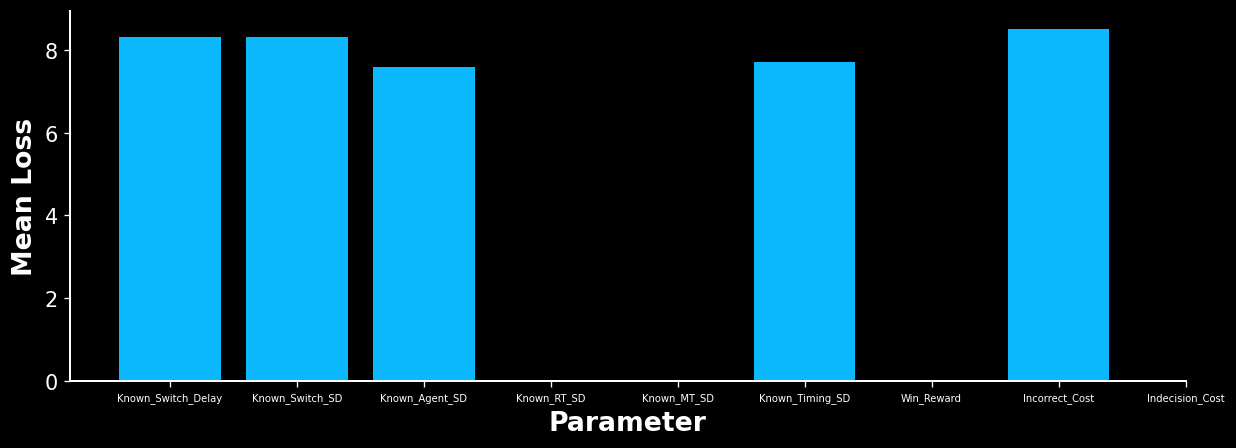

In [8]:
# Get the mean loss when that parameter is False
parameter_mean_loss = {}
for col in df_description.columns[2:11]: # Skipping 'Model', "Loss", "Parameters"
    if col in ['Win_Reward', 'Incorrect_Cost', 'Indecision_Cost']:
        dff = df_description[df_description[col].isin(['Less','Greater'])]
        parameter_mean_loss.update({col:dff['Loss'].mean()})
    else:
        dff = df_description[df_description[col] == False]
        parameter_mean_loss.update({col:dff['Loss'].mean()})
        
num_params = len(parameter_mean_loss.values())
xlocs = np.arange(0,num_params,1)
fig,ax = plt.subplots(dpi=120,figsize=(12,4))
ax.bar(xlocs, parameter_mean_loss.values()) 
ax.set_xticks(xlocs)
ax.set_xticklabels(parameter_mean_loss.keys(), fontsize=6)
ax.set_xlabel('Parameter')
ax.set_ylabel('Mean Loss')
plt.show()

### Mean difference when that parameter is known versus unknown

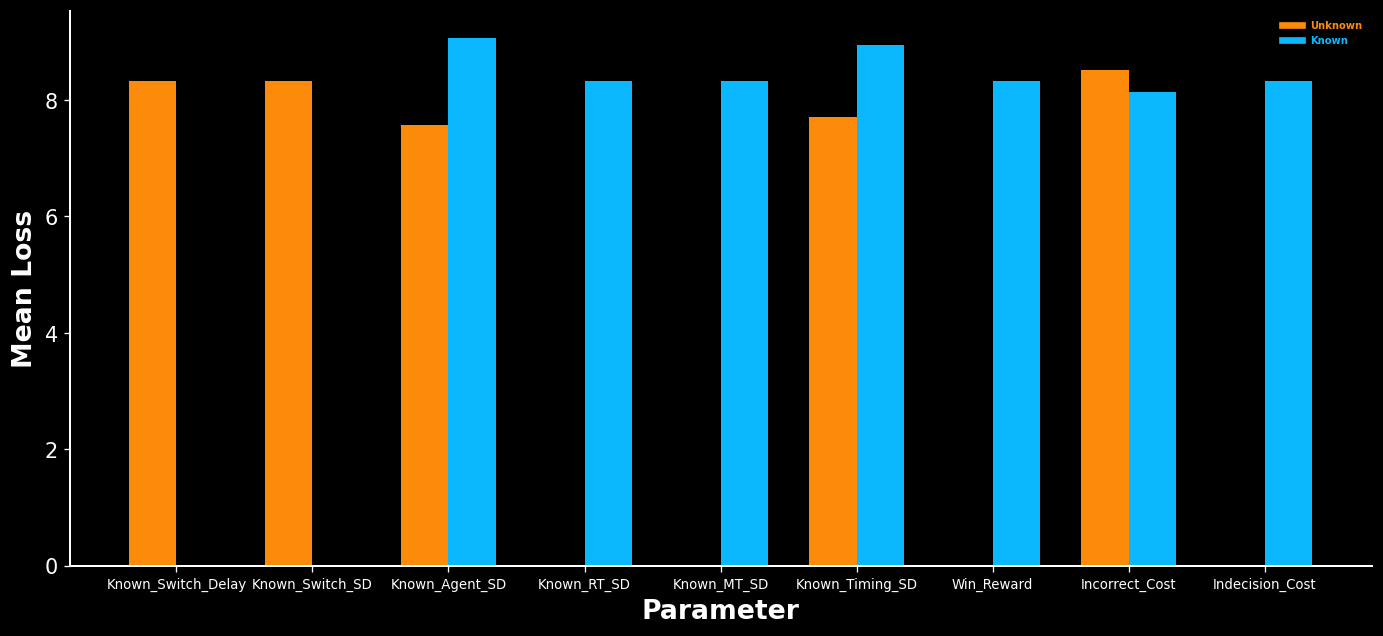

In [9]:
parameter_mean_loss_known = {}
parameter_mean_loss_unknown = {}
for col in df_description.columns[2:11]: # Skipping 'Model', "Loss", "Parameters"
    if col in ['Win_Reward', 'Incorrect_Cost', 'Indecision_Cost']:
        dff_unknown = df_description[df_description[col].isin(['Less','Greater'])]
        parameter_mean_loss_unknown.update({col:dff_unknown['Loss'].mean()})
        dff_known = df_description[df_description[col].isin(['Normal'])]
        parameter_mean_loss_known.update({col:dff_known['Loss'].mean()})
    else:
        dff_unknown = df_description[df_description[col] == False]
        parameter_mean_loss_unknown.update({col:dff_unknown['Loss'].mean()})
        dff_known = df_description[df_description[col] == True]
        parameter_mean_loss_known.update({col:dff_known['Loss'].mean()})
        
num_params = len(parameter_mean_loss_known.values())
xlocs = np.arange(0,num_params,1)
w,h = 14,6
bar_width = w*0.025
fig,ax = plt.subplots(dpi=120,figsize=(w,h))
ax.bar(xlocs+(0.5*bar_width), parameter_mean_loss_known.values(), width=bar_width, color=wheel.rak_blue) 
ax.bar(xlocs-(0.5*bar_width), parameter_mean_loss_unknown.values(),width=bar_width, color=wheel.rak_orange) 
ax.set_xticks(xlocs)
ax.set_xticklabels(parameter_mean_loss.keys(), fontsize=8)
ax.set_xlabel('Parameter')
ax.set_ylabel('Mean Loss')
dv.custom_legend(ax,['Unknown', 'Known'], [wheel.rak_orange, wheel.rak_blue])
plt.show()

In [21]:
a = 'switch_expected'
exp_key = '_expected'
if exp_key in a:
    print(a.strip(exp_key))

switch


## Filter out Models

Minimal Loss Models

In [10]:
num_best_models = 5
best_models_df = df.nsmallest(num_best_models,'Loss')
best_models_description = df_description.nsmallest(num_best_models,'Loss')
best_models_description


,Model,Loss,Known_Switch_Delay,Known_Switch_SD,Known_Agent_SD,Known_RT_SD,Known_MT_SD,Known_Timing_SD,Win_Reward,Incorrect_Cost,Indecision_Cost,Parameters,BIC
3,model3_2023_09_26_12_02_36,7.299633,False,False,False,True,True,False,Normal,Less,Normal,5,-5.179502
4,model4_2023_09_26_12_02_43,7.345550,False,False,False,True,True,False,Normal,Normal,Normal,4,-8.049823
5,model5_2023_09_26_12_02_51,7.348110,False,False,False,True,True,False,Normal,Less,Normal,5,-5.047122
0,model0_2023_09_26_12_02_16,7.364968,False,False,False,True,True,False,Normal,Normal,Normal,4,-7.997021
2,model2_2023_09_26_12_02_29,7.376695,False,False,False,True,True,False,Normal,Normal,Normal,4,-7.965203


Minimal BIC Models

In [11]:
best_models_bic_df = df.nsmallest(5,'BIC')
best_models_bic_df_description = df_description.nsmallest(5,'BIC')
best_models_bic_df_description

,Model,Loss,Known_Switch_Delay,Known_Switch_SD,Known_Agent_SD,Known_RT_SD,Known_MT_SD,Known_Timing_SD,Win_Reward,Incorrect_Cost,Indecision_Cost,Parameters,BIC
18,model18_2023_09_26_12_04_12,7.381393,False,False,True,True,True,False,Normal,Normal,Normal,3,-10.948202
22,model22_2023_09_26_12_04_34,7.407337,False,False,True,True,True,False,Normal,Normal,Normal,3,-10.878028
20,model20_2023_09_26_12_04_23,7.634452,False,False,True,True,True,False,Normal,Normal,Normal,3,-10.274027
10,model10_2023_09_26_12_03_22,7.650109,False,False,False,True,True,True,Normal,Normal,Normal,3,-10.233051
14,model14_2023_09_26_12_03_49,7.665283,False,False,False,True,True,True,Normal,Normal,Normal,3,-10.193420


Single Parameter Models

In [12]:
mask = 'Parameters == 1 or Parameters==0'
single_parameter_models = df.query(mask)
single_parameter_models_description = df_description.query(mask)
display(single_parameter_models_description)
display(single_parameter_models)

,Model,Loss,Known_Switch_Delay,Known_Switch_SD,Known_Agent_SD,Known_RT_SD,Known_MT_SD,Known_Timing_SD,Win_Reward,Incorrect_Cost,Indecision_Cost,Parameters,BIC


,Model,Loss,experiment,num_blocks,agent_means,agent_sds,nsteps,num_timesteps,round_num,expected,key,reaction_sd,movement_sd,timing_sd,guess_switch_sd,guess_sd,use_true_guess_sd,guess_sd_from_data,reaction_time,movement_time,guess_switch_delay,electromechanical_delay,guess_delay,win_reward,incorrect_cost,indecision_cost,prob_selecting_correct_target_reaction,prob_selecting_correct_target_guess,Parameters,BIC


## Run Models

In [13]:
models = {}
for index,row in single_parameter_models.iterrows():
    model  = ModelConstructor(
                        experiment=EXPERIMENT,
                        num_blocks=row.num_blocks,
                        num_timesteps=1800,
                        agent_means=row.agent_means,
                        agent_sds=row.agent_sds, #!
                        reaction_time=row.reaction_time,
                        movement_time=row.movement_time,
                        reaction_sd=row.reaction_sd, #! Reducing these, aka the particiapnt thinks they are more certain than they are
                        movement_sd=row.movement_sd,
                        timing_sd=row.timing_sd,
                        guess_switch_delay=row.guess_switch_delay, # Designed like this for broadcasting reasons
                        guess_switch_sd=row.guess_switch_sd, # This includes electromechanical delay sd and timing sd bc it's straight from data
                        electromechanical_delay=row.electromechanical_delay,
                        switch_cost_exists=True,
                        expected=True,
                        win_reward=row.win_reward,
                        incorrect_cost=row.incorrect_cost,
                        indecision_cost=row.indecision_cost,
                        round_num = 20
                    )
    models.update({row['Model']:model})

In [14]:
d1 = {'a':1,'b':3}
d2 = {'a':2,'b':2}
max_dict = {}
for (k1,v1),(k2,v2) in zip(d1.items(),d2.items()):
    if v1>v2:
        max_dict.update({k1:v1})
    else:
        max_dict.update({k2:v2})


In [15]:
max_dict

{'a': 2, 'b': 3}

# Plots

In [16]:
# line_colors = [wheel.purple, wheel.white, wheel.rak_blue, wheel.rak_orange, wheel.pink]
save = False

In [ ]:
save_path = Path(
    r"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\figures"
)
w, h = 7.5, 6
bw = (
    0.35 * w
) / it.num_blocks  # box widths of all boxes combined takes up 30% of the width
mult_w, div_w = 0.053, 2.3
div_h = 1.75
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 5
ticklabel_fontsize = 6
suptitle_fontsize = 6
label_fontsize = 7
markersize = 0.1*(w*h)

metrics = np.array(
    [
        participant_median_movement_onset_time,
        participant_sd_movement_onset_time,
        participant_perc_wins,
        participant_perc_incorrects,
        participant_perc_indecisions,
    ]
)[
    :, :, [0, 2, 4, 1, 3, 5]
]  # Rearranging axes to get the order I want
ylocs = (
    [np.arange(0, 1751, 250)] + [np.arange(0, 401, 100)] + [np.arange(0, 101, 25)] * 3
)
ylabels = [
    "Participant Movement\nOnset Time (ms)",
    "SD Participant Movement\nOnset Time (ms)",
    "Wins (%)",
    "Incorrects (%)",
    "Indecisions (%)",
]
ylims = [(0, 1750)] + [(0, 400)] + [(0, 100)] * 3

model_labels = ["Base Model", "Optimal Model", "Suboptimal Model"]
# save_names = ["exp1_results_only_optimal_model", 'exp1_results_both_models','exp1_results_statistics',]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
legend_locs = (0.58, 0.86)
median_dicts = [base_medians, optimal_medians, suboptimal_medians]
interval_dicts = [base_intervals, optimal_intervals, suboptimal_intervals]

mosaic = "aabb;ccdd;.ee."
fig = pf.NewFigure(mosaic, dpi=300, figsize=(w, h),wspace=None, hspace=None)
axs = list(fig.axes.values())
model_colors = [wheel.grey, wheel.dark_grey, wheel.black]
# * Looping axes for each metric
for i, (ax, col_name) in enumerate(zip(axs, col_names)):
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4
        )
        for k, (model_medians, model_intervals) in enumerate(
            zip(median_dicts, interval_dicts)
        ):
            if k == 0:
                shift = -bw / 3
            if k == 1:
                shift = +bw / 3
            pf.plot_boostrapped_model_results(
                ax,
                xlocs[j] + shift,
                y=model_medians[col_name][j],
                percentiles=model_intervals[col_name][:, j],
                horizontal_lw=0,
                markersize=markersize,
                color=model_colors[k],
            )

    # dv.jitter_array(ax=ax,x_positions=xlocs,data=metrics[i,:,:].T,
    #                 data_color = constants.xticklabel_colors_means,
    #                 data_edge_color = wheel.lighten_color(wheel.light_grey,1.2),
    #                 noise_scale=0.06, include_mean = False, circle_size=40)

    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize)
    dv.legend(ax, labels=model_labels, colors=model_colors,fontsize=legend_fontsize)
    # [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]

fig.add_all_letters()
fig.fig.facecolor = 1
# fig.pad_fig(w_pad=-2,h_pad=0,w_space=-2,h_space=0.1)
for ax_label in ["a","b","c", "d"]:
    if ax_label in ["b","d"]:
        fig.adjust_position(fig.axes[ax_label], (-0.1, 0))
    fig.adjust_size(fig.axes[ax_label], (0.1, 0))
# plt.subplots_adjust(right=0.8)
# plt.subplot_tool()
plt.show()
# fig.savefig(SAVE_PATH / "test.png")

AttributeError: module 'plot_functions' has no attribute 'multiple_models_boxplot_v2'

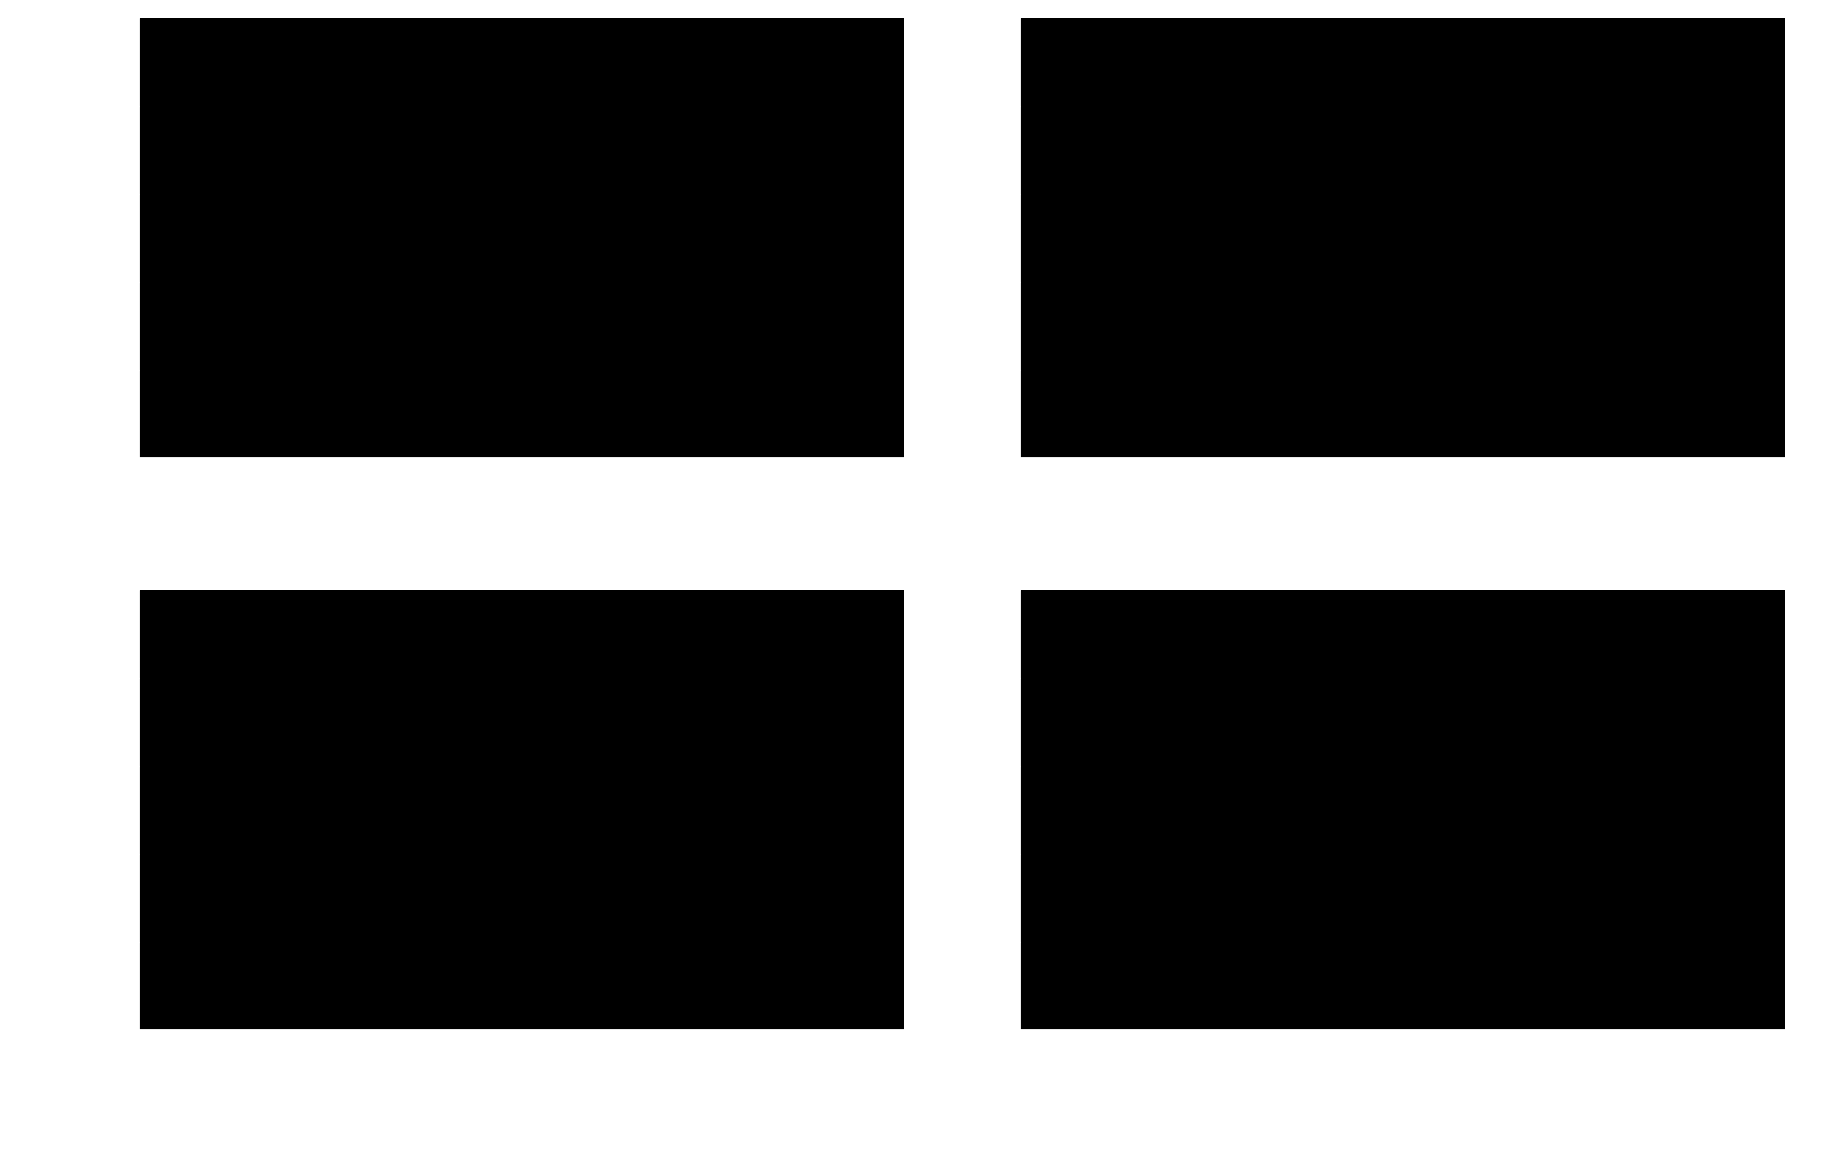

In [17]:
w, h = 16, 10

mult_w, div_w = 0.053, 2.3
div_h = 2.5
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 10

metrics = [
    np.nanmedian(group.movement_metrics.movement_onset_times("task"), axis=2),
    group.score_metrics.score_metric("wins") / group.exp_info.num_task_trials * 100,
    group.score_metrics.score_metric("incorrects") / group.exp_info.num_task_trials * 100,
    group.score_metrics.score_metric("indecisions") / group.exp_info.num_task_trials * 100,
]
ylocs = [np.arange(400, 1601, 200)] + [np.arange(0, 101, 25)] * 3
ylabels = ["Time (ms)", "Wins (%)", "Incorrects (%)", "Indecisions (%)"]
titles = ["Median Movement Onset Time", "Wins", "Incorrects", "Indecisions"]
model_labels = [name.split("_")[0] for name in models.keys()]  # Get the model names, only up to the number, ignore date

fig = dv.Figure(figsize=(w, h), dpi=110)
ax1 = fig.add_panel(dim=(w * mult_w, 0.0, w / div_w, h / div_h))
ax2 = fig.add_panel(dim=(w / div_w + 1.9, 0.0, w / div_w, h / div_h))
ax3 = fig.add_panel(dim=(w * mult_w, 5.2, w / div_w, h / div_h))
ax4 = fig.add_panel(dim=(w / div_w + 1.9, 5.2, w / div_w, h / div_h))
axs = [ax1, ax2, ax3, ax4]
model_data = [
    [model.results.get_metric(model.player_behavior.wtd_leave_time, metric_type="true", decision_type="optimal") for model in models.values()],
    [model.results.get_metric(model.score_metrics.prob_win, metric_type="true", decision_type="optimal") * 100 for model in models.values()],
    [model.results.get_metric(model.score_metrics.prob_incorrect, metric_type="true", decision_type="optimal") * 100 for model in models.values()],
    [model.results.get_metric(model.score_metrics.prob_indecision, metric_type="true", decision_type="optimal") * 100 for model in models.values()],
]

for j in range(len(model_data)):
    pf.multiple_models_boxplot_v2(
        ax=axs[j],
        data=metrics[j],
        model_data=model_data[j],
        labels=model_labels,
        show_boxplot=True,
        colors=wheel.grey,
        linestyles=None,
        line_colors=None,
        xlocs=xlocs,
        ylocs=ylocs[j],
        xticklabels=it.trial_block_titles,
        xlabel=it.xlabel,
        ylabel=ylabels[j],
        title=titles[j],
        legend_fontsize=legend_fontsize,
        title_fontsize=20,
    )
fig.remove_figure_borders()
# plt.suptitle(suptitles[i], y=1.1, fontsize = 30)

# Base Model

In [ ]:
df_description.head()

,Model,Loss,Known_Switch_Delay,Known_Switch_SD,Known_Guess_SD,Known_Agent_SD,Known_RT_SD,Known_MT_SD,Known_Timing_SD,Win_Reward,Incorrect_Cost,Indecision_Cost,Parameters,BIC
0,model0_2023_09_18_13_50_22,9.166158,True,True,True,False,False,False,False,Normal,Normal,Normal,4,-3.621353
1,model1_2023_09_18_13_50_23,5.864025,True,True,False,False,False,False,False,Normal,Normal,Normal,5,-9.559261
2,model2_2023_09_18_13_50_23,7.949396,True,True,True,False,False,False,False,Normal,Less,Normal,5,-3.474065
3,model3_2023_09_18_13_50_23,6.921337,True,True,False,False,False,False,False,Normal,Less,Normal,6,-3.248074
4,model4_2023_09_18_13_50_23,9.166158,True,False,True,False,False,False,False,Normal,Normal,Normal,5,-0.625620


In [ ]:

# model_names_from_df = list(df_description.query('Parameters == 0 or (Known_Agent_SD==False and Known_Guess_SD==False and Known_Switch_Delay==False and Incorrect_Cost == "Less" and Parameters==4)')['Model'])
# model_names_from_df = list(df_description.query('Parameters == 0 or (Incorrect_Cost=="Less" and Known_Switch_Delay==False and Parameters==2)')['Model'])
# model_names_from_df = list(df_description.query('Parameters == 0')['Model'])
base_model_df = df[df['Model'].isin(model_names_from_df)]
base_model_df = base_model_df.sort_values('Parameters')
model_names = ['Theoretical Optimal', 'Theoretical Optimal\n(Not Accounting for Switch Delay)', "Blah", "Blah"]
display(base_model_df)
models = {}
for i, (index, row) in enumerate(base_model_df.iterrows()):
    model  = ModelConstructor(
        experiment=EXPERIMENT,
        num_blocks=row.num_blocks,
        num_timesteps=1800,
        agent_means=row.agent_means,
        agent_sds=row.agent_sds, #!
        reaction_time=row.reaction_time,
        movement_time=row.movement_time,
        reaction_sd=row.reaction_sd, #! Reducing these, aka the particiapnt thinks they are more certain than they are
        movement_sd=row.movement_sd,
        timing_sd=row.timing_sd,
        guess_switch_delay=row.guess_switch_delay, # Designed like this for broadcasting reasons
        guess_switch_sd=row.guess_switch_sd, # This includes electromechanical delay sd and timing sd bc it's straight from data
        # guess_sd=row.guess_sd,
        electromechanical_delay=row.electromechanical_delay,
        switch_cost_exists=True,
        expected=True,
        win_reward=row.win_reward,
        incorrect_cost=row.incorrect_cost,
        indecision_cost=row.indecision_cost,
        round_num = 23
    )
    models.update({model_names[i]:model})

,Model,Loss,experiment,num_blocks,agent_means,agent_sds,nsteps,num_timesteps,round_num,expected,key,reaction_sd,movement_sd,timing_sd,guess_switch_sd,guess_sd,guess_sd_from_data,reaction_time,movement_time,guess_switch_delay,electromechanical_delay,guess_delay,win_reward,incorrect_cost,indecision_cost,prob_selecting_correct_target_reaction,prob_selecting_correct_target_guess,Parameters,BIC
240,model240_2023_09_18_13_51_02,10.034863,Exp1,6,"[[[999.306492462158], [1007.1201977157594], [1...","[[[48.76188568196375], [147.5029109578432], [4...",1,1800,3,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[26.542679574365813]], [[26.542679574365813]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[65]], [[65]]]","[[[74.73005247543776], [115.3949109228306], [9...",True,"[[[241.25]], [[241.25]]]","[[[157.25]], [[157.25]]]","[[[65]], [[65]]]","[[[50]], [[50]]]","[[[115]], [[115]]]",1.0,0.0,0.0,1.0,0.5,0,-13.793339
250,model250_2023_09_18_13_51_04,11.537934,Exp1,6,"[[[999.306492462158], [1007.1201977157594], [1...","[[[48.76188568196375], [147.5029109578432], [4...",1,1800,3,True,1,"[[[37.69512147152565]], [[37.69512147152565]]]","[[[26.542679574365813]], [[26.542679574365813]]]","[[[76.61368327991575], [76.61368327991575], [7...","[[[65]], [[65]]]","[[[74.73005247543776], [115.3949109228306], [9...",True,"[[[241.25]], [[241.25]]]","[[[157.25]], [[157.25]]]","[[[65]], [[0]]]","[[[50]], [[50]]]","[[[115]], [[50]]]",1.0,-0.2,0.0,1.0,0.5,2,-5.010376


In [ ]:
SHOW_BOXPLOTS = True
SHOW_MODELS = True
w,h = 10,6
mult_w, div_w = 0.9,1.1
div_h = 1.1
bw = 0.4*w/it.num_blocks # box widths of all boxes combined takes up 30% of the width

Movement Onset

[array([1240.55652025, 1213.71706618, 1339.73550781, 1226.15577082,
        481.        , 1154.15754576]), array([1240.55652705, 1232.89937032, 1339.73970617, 1279.87751444,
       1132.05550748, 1233.58188464])]


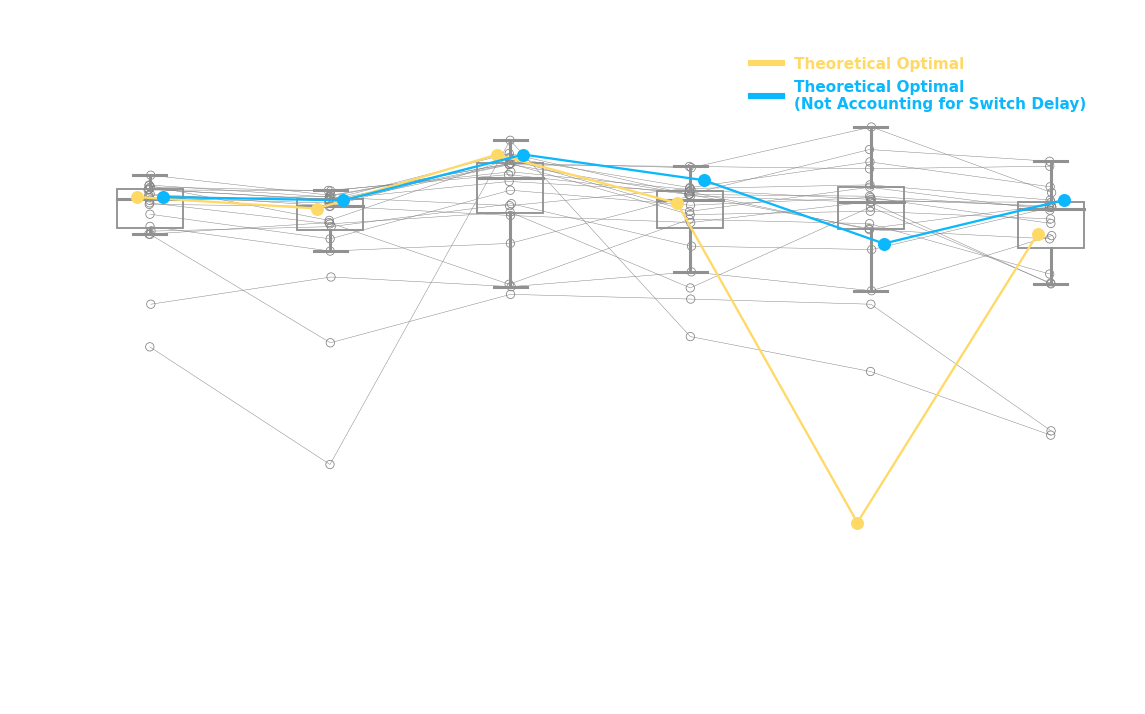

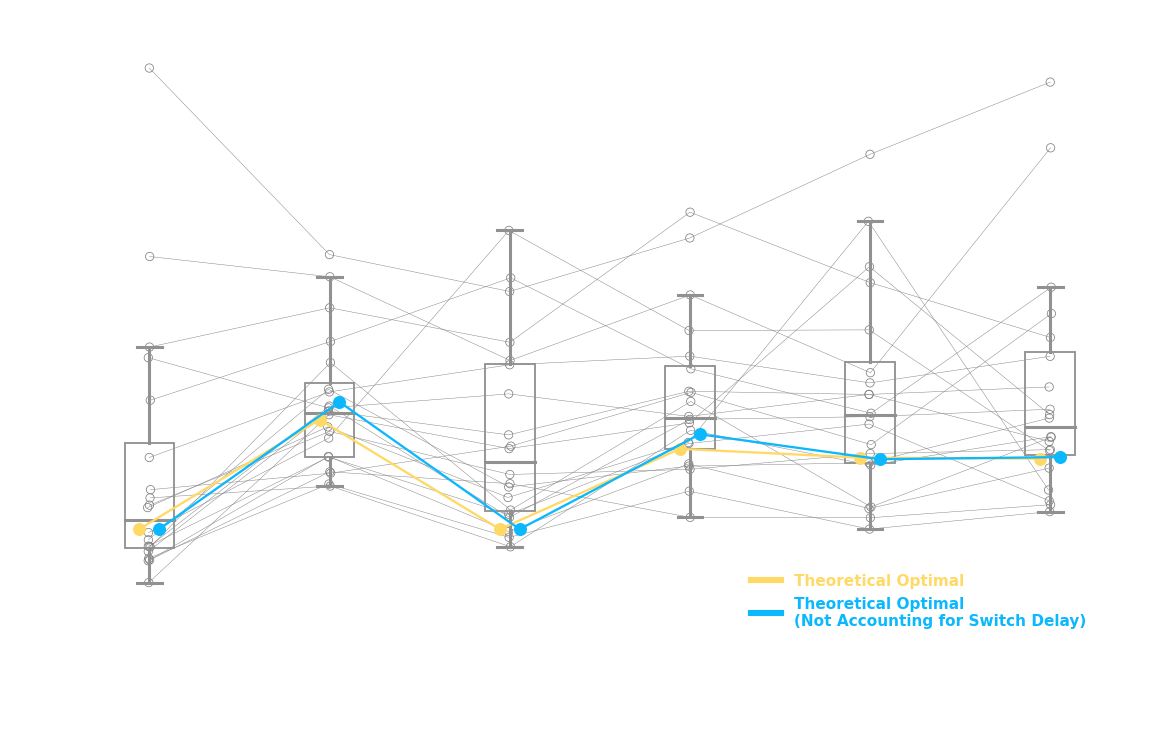

In [ ]:
if True:
    xlocs = np.linspace(0, w/div_w, num=len(it.trial_block_titles))
    legend_fontsize = 10

    metric = np.nanmedian(group.movement_metrics.movement_onset_times('task'), axis=2)
    ylocs = np.arange(200, 1601, 200)
    ylabel = 'Time (ms)'
    title = 'Median Movement Onset Time' 

    fig = dv.Figure(figsize=(w, h), dpi=110)
    ax = fig.add_panel(dim=(0.6, 0, w / div_w, h / div_h))
    model_data = [model.results.get_metric(model.player_behavior.wtd_leave_time,metric_type='true',decision_type='optimal') for model in models.values()]
    print(model_data)
    pf.multiple_models_boxplot_v2(
            ax=ax,
            data=metric,
            box_width = bw,
            model_data=model_data,
            show_boxplot=SHOW_BOXPLOTS,
            show_models=SHOW_MODELS,
            labels=list(models.keys()),
            colors=wheel.grey,
            linestyles=None,
            line_colors = None,
            xlocs=xlocs,
            ylocs=ylocs,
            xticklabels=it.trial_block_titles,
            xlabel=it.xlabel,
            ylabel=ylabel,
            title=title,
            legend_fontsize=legend_fontsize,
            title_fontsize=20
        )
    ax.set_ylim(200,1600)
    fig.remove_figure_borders()
if True:
    xlocs = np.linspace(0, w/div_w, num=len(it.trial_block_titles))
    legend_fontsize = 10

    metric = np.nanstd(group.movement_metrics.movement_onset_times('task'), axis=2)
    ylocs = np.arange(0, 201, 50)
    ylabel = 'Time (ms)'
    title = 'SD Movement Onset Time' 

    fig = dv.Figure(figsize=(w, h), dpi=110)
    ax = fig.add_panel(dim=(0.6, 0, w / div_w, h / div_h))
    model_data = [model.results.get_metric(model.player_behavior.wtd_leave_time_sd,metric_type='true',decision_type='optimal') for model in models.values()]

    bw = 0.3*w/it.num_blocks # box widths of all boxes combined takes up 30% of the width

    pf.multiple_models_boxplot_v2(
            ax=ax,
            data=metric,
            box_width = bw,
            model_data=model_data,
            labels=list(models.keys()),
            show_boxplot=True,
            colors=wheel.grey,
            linestyles=None,
            line_colors = None,
            xlocs=xlocs,
            ylocs=ylocs,
            xticklabels=it.trial_block_titles,
            xlabel=it.xlabel,
            ylabel=ylabel,
            title=title,
            legend_fontsize=legend_fontsize,
            title_fontsize=20
        )

### Wins

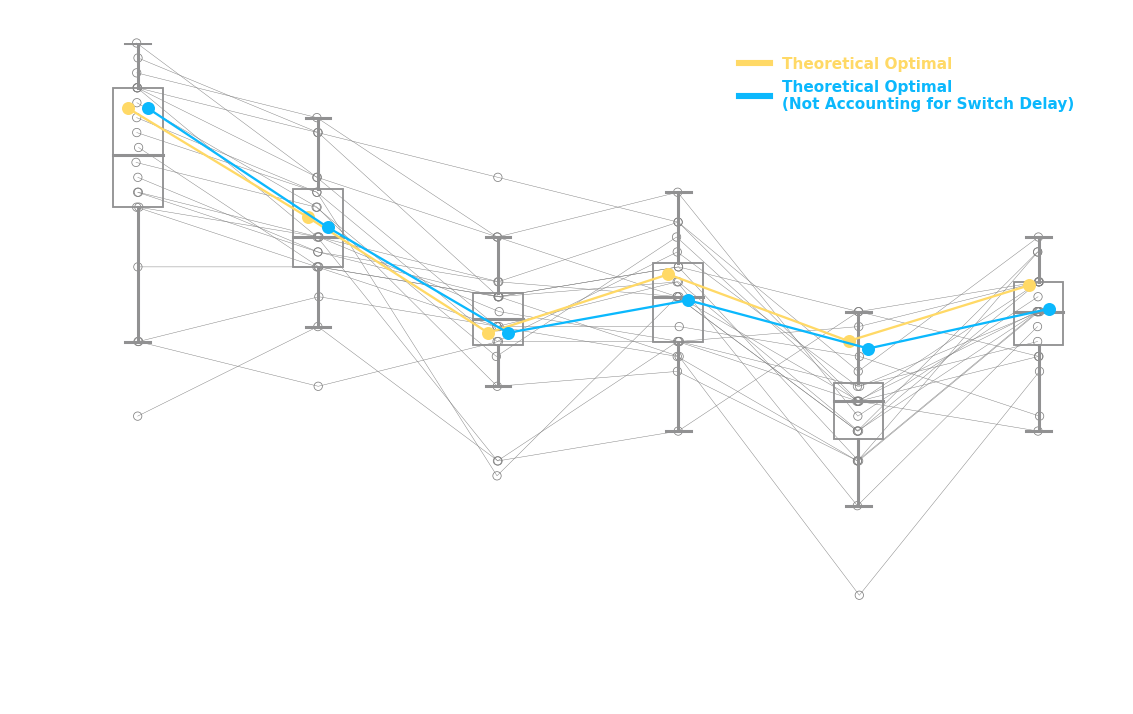

In [ ]:
xlocs = np.linspace(0, w/div_w, num=len(it.trial_block_titles))
legend_fontsize = 10

metric = group.score_metrics.score_metric('wins')*100/group.exp_info.num_task_trials
ylocs = np.arange(0, 101, 25)
ylabel = 'Time (ms)'

fig = dv.Figure(figsize=(w, h), dpi=110)
ax = fig.add_panel(dim=(0.6, 0, w / div_w, h / div_h))
model_data = [model.results.get_metric(model.score_metrics.prob_win ,metric_type='true',decision_type='optimal')*100 for model in models.values()]

pf.multiple_models_boxplot_v2(
        ax=ax,
        data=metric,
        box_width = bw,
        model_data=model_data,
        show_boxplot=SHOW_BOXPLOTS,
        show_models=SHOW_MODELS,
        labels=list(models.keys()),
        colors=wheel.grey,
        linestyles=None,
        line_colors = None,
        xlocs=xlocs,
        ylocs=ylocs,
        xticklabels=it.trial_block_titles,
        xlabel=it.xlabel,
        ylabel='Percentage (%)',
        title='Wins',
        legend_fontsize=legend_fontsize,
        title_fontsize=20,
    )
ax.set_ylim(-0.5,100)
fig.remove_figure_borders()

### Incorrects

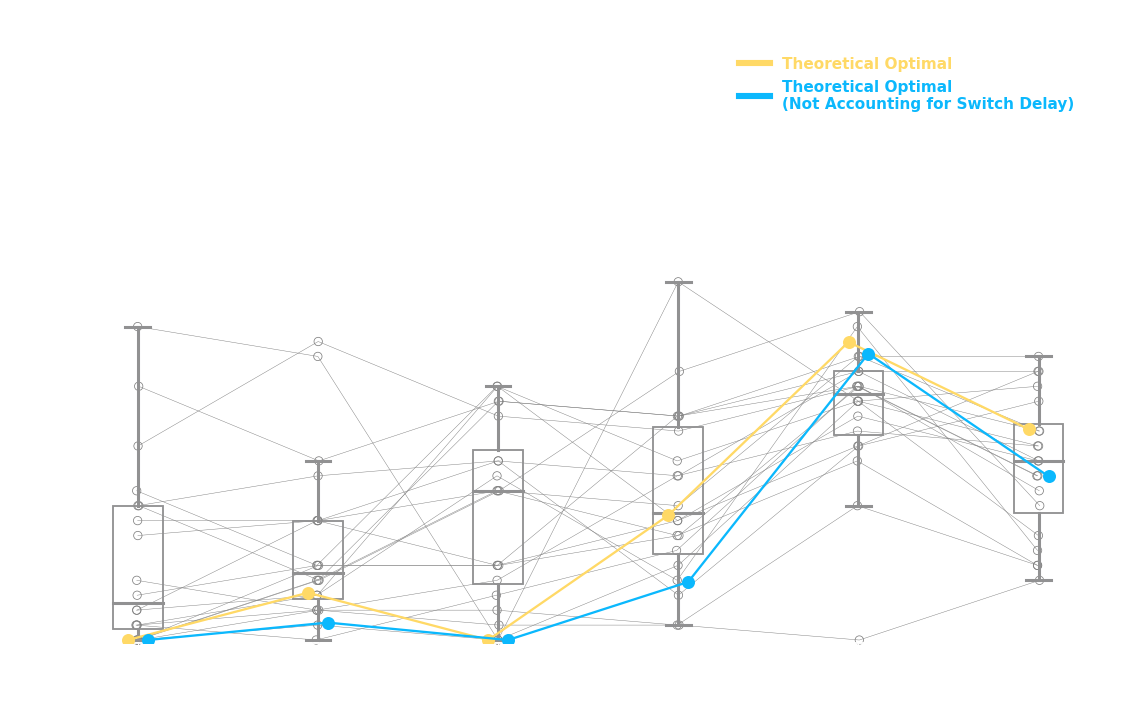

In [ ]:
xlocs = np.linspace(0, w/div_w, num=len(it.trial_block_titles))
legend_fontsize = 10

metric = group.score_metrics.score_metric('incorrects')*100/group.exp_info.num_task_trials
ylocs = np.arange(0, 101, 25)
ylabel = 'Time (ms)'

fig = dv.Figure(figsize=(w, h), dpi=110)
ax = fig.add_panel(dim=(0.6, 0, w / div_w, h / div_h))
model_data = [model.results.get_metric(model.score_metrics.prob_incorrect ,metric_type='true',decision_type='optimal')*100 for model in models.values()]

pf.multiple_models_boxplot_v2(
        ax=ax,
        data=metric,
        box_width = bw,
        model_data=model_data,
        show_boxplot=SHOW_BOXPLOTS,
        show_models=SHOW_MODELS,
        labels=list(models.keys()),
        colors=wheel.grey,
        linestyles=None,
        line_colors = None,
        xlocs=xlocs,
        ylocs=ylocs,
        xticklabels=it.trial_block_titles,
        xlabel=it.xlabel,
        ylabel='Percentage (%)',
        title='Incorrects',
        legend_fontsize=legend_fontsize,
        title_fontsize=20,
    )
ax.set_ylim(-0.5,100)
fig.remove_figure_borders()

Indecisions

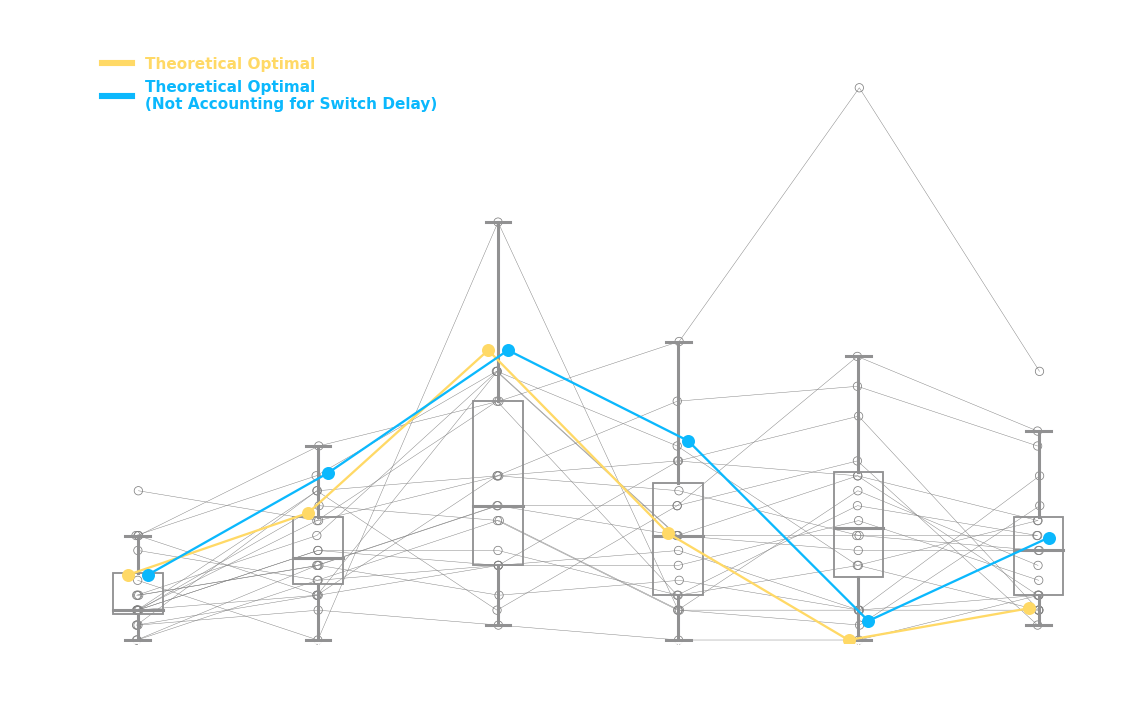

In [ ]:
xlocs = np.linspace(0, w/div_w, num=len(it.trial_block_titles))
legend_fontsize = 10

metric = group.score_metrics.score_metric('indecisions')*100/group.exp_info.num_task_trials
ylocs = np.arange(0, 101, 25)
ylabel = 'Time (ms)'

fig = dv.Figure(figsize=(w, h), dpi=110)
ax = fig.add_panel(dim=(0.6, 0, w / div_w, h / div_h))
model_data = [model.results.get_metric(model.score_metrics.prob_indecision ,metric_type='true',decision_type='optimal')*100 for model in models.values()]
pf.multiple_models_boxplot_v2(
        ax=ax,
        data=metric,
        box_width = bw,
        model_data=model_data,
        show_boxplot=SHOW_BOXPLOTS,
        show_models=SHOW_MODELS,
        labels=list(models.keys()),
        colors=wheel.grey,
        linestyles=None,
        line_colors = None,
        xlocs=xlocs,
        ylocs=ylocs,
        xticklabels=it.trial_block_titles,
        xlabel=it.xlabel,
        ylabel='Percentage (%)',
        title='Indecisions',
        legend_fontsize=legend_fontsize,
        title_fontsize=20,
    )
ax.set_ylim(-0.5,100)
fig.remove_figure_borders()

In [ ]:
model_data

[array([10.89794947, 21.27566305, 48.54427229, 17.8413471 ,  0.        ,
         5.30705223]),
 array([10.89794946, 27.95785088, 48.54422968, 33.35927208,  3.19967224,
        17.13837687])]